<h1><center> R to Python<br><br>Marketing Research and Analytics<br><br>CHAPTER 3: Describing Data </center></h1>

This tutorial aims at providing the python code for the book *R for Marketing Research and Analytics* (Chapman, Christopher N., McDonnell Feit, Elea). We will follow the chapters of the book and provide a Python version of the R code presented in the book.
<br>In this tutorial, we tackle chapter 3 of the book. Please look at the other tutorials for other chapters.

## STEP 1: Importing the required libraries

In [59]:
#Libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
import scipy as sp
from scipy import stats
import astropy
from astropy import stats
from statsmodels.distributions.empirical_distribution import ECDF
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

## STEP 2: Creating the dataset for store data
<br>**Description of the dataset**:
This dataset represents observations of total sales by week for two products at a chain of stores.
<br><br>**Description of the variables**:
- *storeNum* : ID of the store (from 1 to 20)
- *Year* : year number (year 1 or 2)
- *Week* : week number
- *p1sales* : sales of product 1
- *p2sales* : sales of product 2
- *p1price* : price of product 1
- *p2price* : price of product 2
- *p1prom* : promotion of product 1
- *p2prom* : promotion of product 2
- *country* : country 

In [77]:
#Python: Create the number of stores
k_stores =20

In [5]:
#Python: Create the number of weeks variables (2 years data)
k_weeks = 104

In [6]:
#Create an empty dataframe that we will fill afterwards
columns_names=['storeNum', 'Year', 'Week', 'p1sales', 'p2sales', 'p1price', 'p2price', 
               'p1prom', 'p2prom', 'country']
store_df=pd.DataFrame(columns=columns_names)

In [7]:
#Create the storeNum variable
store_num=range(101,(101+k_stores))*(k_weeks)
store_df['storeNum']=store_num

In [9]:
#Create the country variable
store_cty=["US", "US", "US", "DE", "DE", "DE", "DE", "DE", "GB", "GB", "GB", "BR", "BR", 
           "JP", "JP", "JP", "JP", "AU", "CN", "CN"] * k_weeks
store_df['country']=store_cty

<font color=red>R code</font>: *rep() function*
<br>$store{\_}df\$Week <- rep(1:52, times=k.stores*2)$

In [10]:
#Python: Create the weeks variable
#range(begin, end) is exclusive for end. Hence, when we want to list numbers from 1 to 52 we need to enter range(1,53)
store_weeks=range(1,53) 
store_weeks_tot=np.repeat(store_weeks, k_stores*2)
store_df['Week']=store_weeks_tot

<font color=green>**Cracking the code**</font>: **$np.repeat$** 
<br>This function allows you to repeat elements of an array a defined number of times.
<br>**Syntax**: $np.repeat(elements{\_}to{\_}repeat, num{\_}repetitions)$
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html

In [14]:
#Create the Year variable
store_year=np.repeat([1,2], k_stores) #Output: [list of 20 1s, list of 20 2s]
store_year_tot=np.tile(store_year, k_weeks/2) #Output: [store_year repeated 52 times]
store_df['Year']=store_year_tot

<font color=green>**Cracking the code**</font>: **$np.tile$** 
<br>This function allows you to repeat an array a defined number of times.
<br>**Syntax**: $np.tile(array, num{\_}repetitions)$
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [17]:
#Create the promotion variables with a binomial distribution

<font color=blue>**The Maths behind it**</font>: **Binomial distribution**
<br>Discrete probability distribution of the number of successes in a sequence of n **independent experiments**, each asking a yes-no question, and each with a 0-1 outcome. If the random variable X follows a binomial distribution with parameters  n ∈ ℕ and p ∈ [0,1], we write X ~ B(n, p). Below is a summary of the characteristics
- Two possible outcomes: 0 = failure, 1 = success
- n : number of independent experiments. 
- p : probability of success. 
- Expectation: $E[X] = np$, Variance: $Var(X) = np(1-p)$
- For m successes of event X in n total trials with *p = proba of one success*
$$P(X=m) = \binom{n}{m}p^{m}(1-p)^{n-m}= \frac{n!}{m!(n-m)!}p^{m}(1-p)^{n-m}$$
<br>*Example*: Probability that a couple has one boy out of 5 children.
- Success= having a boy.
- $p = 0.5, n = 5, m = 1$
<br>$P(X = 1) = \frac{5!}{1!(5-1)!}0.5^{1}(1-0.5)^{5-1}\approx 16\%$
<br>*To go further*: http://mathworld.wolfram.com/BinomialDistribution.html

<font color=red>R code</font>: *Binomial distribution*
<br>$rbinom(n=nrow(store{\_}df),\,size=1,\,p=0.1)$

In [ ]:
rows, col=store_df.shape
store_df['p1prom']=np.random.binomial(1, 0.1, rows)
store_df['p2prom']=np.random.binomial(1, 0.15, rows)

<font color=green>**Cracking the code**</font>: **$np.random.binomial$**
<br>This function draws samples from a binomial distribution.
<br>**Syntax**: $np.random.binomial(n, p, size)$, n = number of successes, p = probability of success, size = number of experiments.
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html

In [ ]:
#Create the prices variables: draw randomly numbers from a list of 5 prices

<font color=red>R code</font>: *Random drawing from a list*
<br>$sample(x=c(2.19, 2.29, 2.49, 2.79, 2.99),size=nrow(store{\_}df), replace=TRUE)$

In [18]:
#List of prices for each product
price1=[2.19, 2.29, 2.49, 2.79, 2.99]
price2=[2.29, 2.49, 2.59, 2.99, 3.19]

In [19]:
#Randomly draw the prices for product 1 and 2
store_df['p1price']=np.random.choice(price1, rows, replace=True)
store_df['p2price']=np.random.choice(price2, rows, replace=True)

In [ ]:
#Create the sales variables using a Poisson distribution

<font color=blue>**The Maths behind it**</font>: **Poisson distribution**
<br>The Poisson distribution is the limit of the binomial distribution for large N. Discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. 
<br>*Probability of events*: an event can occur several times in an interval. The average number of events in an interval is noted as $\lambda$, this is the event rate. Probability of observing $k$ events in an interval is given by the equation: $$P(k\,events\,in\,interval) = e^{-\lambda}\frac{\lambda^{k}}{k!}$$
<br><br>*Examples of events following a Poisson distribution*:
- Number of emergency calls recorded at a hospital in a day
- Number of customers arriving at a salon in an hour
- Number of suicides reported in a particular city
- Number of printing errors at each page of the book

*To go further*: http://mathworld.wolfram.com/PoissonDistribution.html

<font color=red>R code</font>: *Poisson distribution*
<br>$rpois(n=nrow(store{\_}df),\,lamda=120)$

In [21]:
#STEP 1: default sales in absence of promotion
tmp_sales1=np.random.poisson(lam=120, size=rows)
tmp_sales2=np.random.poisson(lam=100, size=rows)

<font color=green>**Cracking the code**</font>: **$np.random.poisson$**
<br>This function draws samples from a poisson distribution. 
<br>**Syntax**: $np.random.poisson(lam= lambda, size = output\,shape)$
<br>**Reference**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html

In [22]:
#STEP 2 : scale sales according to the ratio of log(price)
tmp_sales1=tmp_sales1*np.log(store_df['p2price'])/np.log(store_df['p1price'])
tmp_sales2=tmp_sales2*np.log(store_df['p1price'])/np.log(store_df['p2price'])

In [23]:
#STEP 3: decide arbitrarily that sales get a 30% lift for prod1 and 40% for prod2 when promoted
store_df['p1sales']=(tmp_sales1 * (1+store_df['p1prom']*0.3)).astype(int)
store_df['p2sales']=(tmp_sales2 * (1+store_df['p2prom']*0.4)).astype(int)

## STEP 3: Summarize a dataframe

<font color=red>R code</font>: *shape of dataset*
<br>$dim(store{\_}df)$

In [73]:
#Python code 
store_df.shape

(2080, 10)

<font color=red>R code</font>: *types of variables*
<br>$str(store{\_}df)$

In [72]:
#Python code
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 10 columns):
storeNum    2080 non-null int64
Year        2080 non-null int32
Week        2080 non-null int32
p1sales     2080 non-null int32
p2sales     2080 non-null int32
p1price     2080 non-null float64
p2price     2080 non-null float64
p1prom      2080 non-null int32
p2prom      2080 non-null int32
country     2080 non-null object
dtypes: float64(2), int32(6), int64(1), object(1)
memory usage: 113.8+ KB


<font color=red>R code</font>: *summary statistics*
<br>$summary(store{\_}df)$

In [24]:
#Python code: Summary statistics for numerical variables
store_df.describe()

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom
count,2080.000000,2080.00000,2080.00000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,110.500000,1.50000,26.50000,133.323077,100.430288,2.546827,2.716058,0.093750,0.150000
std,5.767668,0.50012,15.01194,28.218611,24.876181,0.303881,0.330978,0.291551,0.357157
min,101.000000,1.00000,1.00000,71.000000,53.000000,2.190000,2.290000,0.000000,0.000000
25%,105.750000,1.00000,13.75000,113.000000,83.000000,2.290000,2.490000,0.000000,0.000000
50%,110.500000,1.50000,26.50000,130.000000,96.000000,2.490000,2.590000,0.000000,0.000000
75%,115.250000,2.00000,39.25000,150.000000,114.000000,2.790000,2.990000,0.000000,0.000000
max,120.000000,2.00000,52.00000,282.000000,218.000000,2.990000,3.190000,1.000000,1.000000


In [33]:
#Summarize categorical variables
store_df.describe(include=['O'])

,country
count,2080
unique,7
top,DE
freq,520


<font color=red>R code</font>: *display head of dataset*
<br>$head(store{\_}df)$

In [25]:
#Python code
store_df.head(10)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
0,101,1,1,128,83,2.19,2.49,0,0,US
1,102,1,1,158,71,2.79,3.19,0,0,US
2,103,1,1,119,125,2.99,3.19,0,1,US
3,104,1,1,95,115,2.79,2.29,0,0,DE
4,105,1,1,98,111,2.99,2.59,0,0,DE
5,106,1,1,106,136,2.79,2.49,0,1,DE
6,107,1,1,103,102,2.79,2.49,0,0,DE
7,108,1,1,176,84,2.19,2.99,0,0,DE
8,109,1,1,94,127,2.99,2.49,0,0,GB
9,110,1,1,177,71,2.29,2.99,0,0,GB


<font color=red>R code</font>: *display tail of dataset*
<br>$tail(store{\_}df)$

In [26]:
#Python code
store_df.tail(10)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
2070,111,2,52,162,106,2.19,2.29,1,0,GB
2071,112,2,52,91,129,2.99,2.29,0,0,BR
2072,113,2,52,139,86,2.49,2.99,0,0,BR
2073,114,2,52,132,103,2.49,2.49,1,0,JP
2074,115,2,52,125,112,2.99,2.99,0,0,JP
2075,116,2,52,119,109,2.29,2.29,0,0,JP
2076,117,2,52,100,105,2.79,2.29,0,0,JP
2077,118,2,52,182,99,2.29,3.19,0,1,AU
2078,119,2,52,199,103,2.19,2.99,1,1,CN
2079,120,2,52,118,96,2.29,2.29,0,0,CN


<font color=red>R code</font>: *display a few sets of random rows*
<br>$some(store{\_}df)$

In [27]:
#Python code
store_df.sample(10)

,storeNum,Year,Week,p1sales,p2sales,p1price,p2price,p1prom,p2prom,country
1055,116,1,27,118,121,2.79,2.59,0,0,JP
118,119,2,3,170,67,2.19,2.99,0,0,CN
782,103,2,20,107,111,2.49,2.29,0,0,US
774,115,1,20,99,120,2.99,2.59,0,1,JP
1258,119,1,32,87,112,2.79,2.29,0,0,CN
1369,110,1,35,125,106,2.29,2.29,0,0,GB
699,120,1,18,157,66,2.49,3.19,0,0,CN
1059,120,1,27,169,109,2.19,2.49,1,1,CN
790,111,2,20,120,86,2.99,3.19,0,0,GB
847,108,1,22,116,122,2.49,2.29,0,0,DE


In [29]:
#Apply function to summarize variables

In [30]:
store_df.loc[:, "p1sales":"p2price" ].apply(np.mean, axis=0)

p1sales    133.323077
p2sales    100.430288
p1price      2.546827
p2price      2.716058
dtype: float64

<font color=red>R code</font>: *summarize a defined set of variables*
<br>$apply(store{\_}df[\,,2:9]\,, 2, function(x)\{mean(x)-median(x)\})$

In [75]:
#Python code
store_df.loc[:, "p1sales":"p2prom"].apply(lambda x: np.mean(x)-np.median(x), axis=0)

p1sales    3.323077
p2sales    4.430288
p1price    0.056827
p2price    0.126058
p1prom     0.093750
p2prom     0.150000
dtype: float64

## STEP 4: Summarize a variable

### 1. Discrete variable

<font color=red>R code</font>:  *count number of occurrences of each choice*
<br>$table(store{\_}df\$p1price)$

In [34]:
store_df['p1price'].value_counts()

2.19    458
2.99    422
2.49    408
2.79    406
2.29    386
Name: p1price, dtype: int64

In [ ]:
store_df['p2price'].value_counts()

<font color=red>R code</font>:  *crosstabs*
<br>$table(store{\_}df\$p1price,\, store{\_}df\$p1prom)$

In [76]:
#Python code
pd.crosstab(store_df['p1price'], store_df['p1prom'],margins=True)

p1prom,0,1,All
p1price,,,
2.19,418,40,458
2.29,353,33,386
2.49,365,43,408
2.79,368,38,406
2.99,381,41,422
All,1885,195,2080


In [36]:
p1_table=pd.crosstab(store_df['p1price'], store_df['p1prom'],margins=True)

In [37]:
p2_table=pd.crosstab(store_df['p2price'], store_df['p2prom'],margins=True)

<font color=green>**Cracking the code**</font>: **$pd.crosstab$**
<br>This function computes a cross-tabulation of two (or more) factors. 
<br>**Syntax**: $pd.crosstab(index, columns, margins=True)$, where index = values to group by in the rows, columns = values to group by in the columns, margins = True: add row/columns subtotals.
<br>**Reference**: http://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.crosstab.html

In [38]:
p1_table.loc[:, 1]/(p1_table.loc[:, 0]+p1_table.loc[:,1])

p1price
2.19    0.087336
2.29    0.085492
2.49    0.105392
2.79    0.093596
2.99    0.097156
All     0.093750
dtype: float64

In [39]:
p2_table.loc[:, 1]/(p2_table.loc[:, 0]+p2_table.loc[:,1])

p2price
2.29    0.170370
2.49    0.124105
2.59    0.167500
2.99    0.125000
3.19    0.165865
All     0.150000
dtype: float64

### 2. Continuous variable

<font color=red>R code</font>:  *Max, min, median, IQR ... functions*
<br>- $max(store{\_}df\$p1sales)$
<br>- $min(store{\_}df\$p1sales)$
<br>- $median(store{\_}df\$p1sales)$
<br>- $var(store{\_}df\$p1sales)$
<br>- $sd(store{\_}df\$p1sales)$
<br>- $mad(store{\_}df\$p1sales)$
<br>- $IQR(store{\_}df\$p1sales)$
<br>- $quantile(store{\_}df\$p1sales, probs=c(0.25,0.75))$

In [40]:
#Max of a variable
store_df['p1sales'].max()

282

In [41]:
#Min of a variable
store_df['p1sales'].min()

71

In [44]:
#Median of a variable
store_df['p1sales'].median()

130.0

In [43]:
#Variance of a variable
store_df['p1sales'].var()

796.2899914899942

In [42]:
#Standard deviation of a variable
store_df['p1sales'].std()

28.218610729268622

In [45]:
#Quantile of a variable
store_df['p1sales'].quantile(0.75)

150.0

In [50]:
#IQR: Interquartile
sp.stats.iqr(store_df['p1sales'])

37.0

<font color=green>**Cracking the code**</font>: **$scipy.stats.iqr$**
<br>This function computes the interquartile range (IQR) of the data. The IQR is the difference between the 75th and 25th percentile of the data. It is more robust to outliers than standard deviation or variance.
<br>**Syntax**: $scipy.stats.iqr(variable)$
<br>**Reference**: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.iqr.html

In [49]:
#MAD: Mean Absolute Deviation
astropy.stats.median_absolute_deviation(store_df['p1sales'])

18.0

<font color=green>**Cracking the code**</font>: **$astropy.stats.median{\_}absolute{\_}deviation$**
<br>This function calculates the mean absolute deviation (MAD). MAD is defined as median(abs(a-median(a)))
<br>**Syntax**: $astropy.stats.median{\_}absolute{\_}deviation(data)$
<br>**Reference**: http://docs.astropy.org/en/stable/api/astropy.stats.median_absolute_deviation.html

## STEP 5: Data visualization

### 1. Histogram (count)

<font color=red>R code</font>: 
$$
hist(store{\_}df\$p1sales,\\
     \> main = "Product \, 1 \,Weekly \,Sales \,Frequencies,\, All\, stores",\\
     \> xlab = "Product \,1 \,Sales \,(Units)",\\
     \> ylab = "Count",\\
      \> breaks = 30,\\
      \> col = "lightblue")
$$

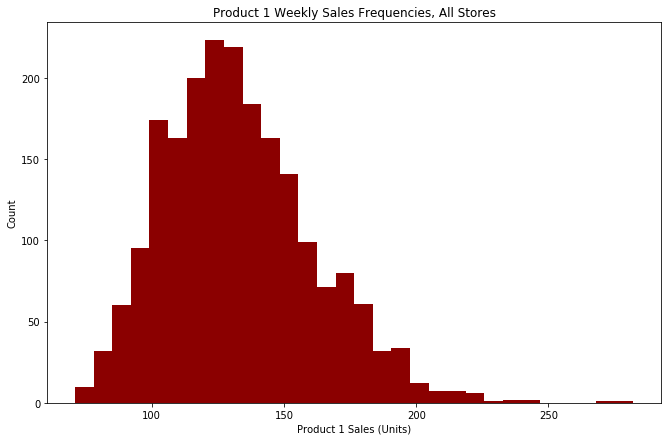

In [51]:
plt.hist(store_df['p1sales'], 
         bins=30, 
         color="darkred")
plt.xlabel("Product 1 Sales (Units)")
plt.ylabel("Count")
plt.title("Product 1 Weekly Sales Frequencies, All Stores")
plt.show()

### 2. Histogram (frequency)

<font color=red>R code</font>: 
$$
hist(store{\_}df\$p1sales,\\
     \> main = "Product \, 1 \,Weekly \,Sales \,Frequencies,\, All\, stores",\\
     \> xlab = "Product \,1 \,Sales \,(Units)",\\
     \> ylab = "Count",\\
      \> breaks = 30,\\
      \> freq = FALSE,\\
      \> col = "lightblue")
$$
freq = FALSE : use density instead of counts on Y axis

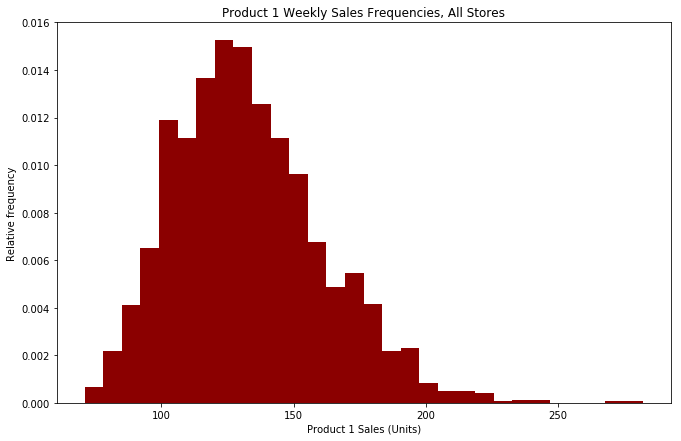

In [52]:
plt.hist(store_df['p1sales'], 
         bins=30, 
         density=True,
         color="darkred")
plt.xlabel("Product 1 Sales (Units)")
plt.ylabel("Relative frequency")
plt.title("Product 1 Weekly Sales Frequencies, All Stores")
plt.show()

### 3. Simple Boxplot

<font color=red>R code</font>: 
$$
boxplot(store{\_}df\$p2sales,\\
     \> main = "Weekly \, Sales \,of \,P2,\, All\, stores",\\
     \> xlab = "Weekly\,Sales",\\
     \> ylab = "P2",\\
      \>horizontal = TRUE)
$$

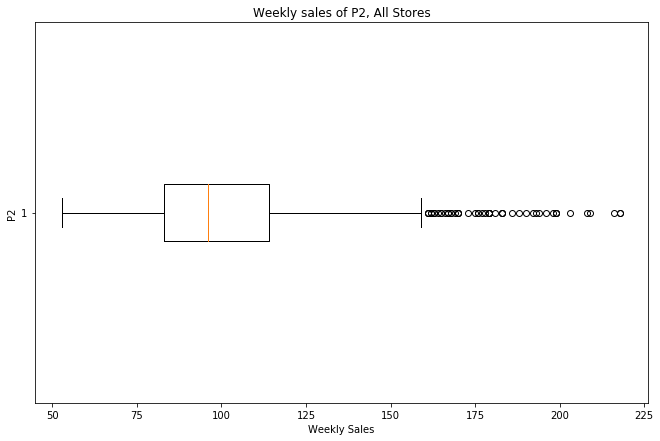

In [53]:
plt.boxplot(store_df['p2sales'],
            vert=False)
plt.xlabel("Weekly Sales")
plt.ylabel("P2")
plt.title("Weekly sales of P2, All Stores")
plt.show()

### 4. Boxplot depending on a category

<font color=red>R code</font>: 
$$
boxplot(store{\_}df\$p2sales \sim store{\_}df\$storeNum,\\
     \> main = "Weekly \, Sales \,of \,P2,\, by\, Store",\\
     \> xlab = "Weekly\,Sales",\\
     \> ylab = "Store",\\
     \>las =1, \\
      \>horizontal = TRUE)
$$

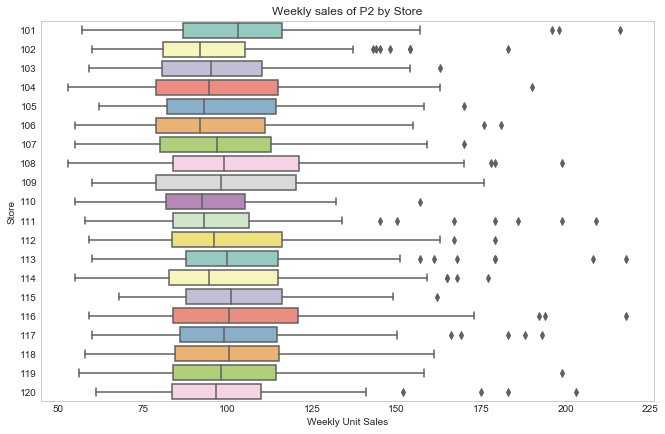

In [54]:
sns.set_style("whitegrid")
sns.boxplot(x='p2sales',
            y='storeNum',
            data=store_df,
            palette="Set3",
            orient="h").grid(False)
plt.xlabel("Weekly Unit Sales")
plt.ylabel("Store")
plt.title("Weekly sales of P2 by Store")
plt.show()

### 5. QQplot to check normality

<font color=red>R code</font>: <br>
$qqnorm(store{\_}df\$p1sales)\\
qqline(store{\_}df\$p1sales)$

<font color=green>**Cracking the code**</font>: **$scipy.stats.probplot$**
<br>Generates a probability plot of sample data against the quantiles of the normal distribution (by default).
<br>**Interpretation**: If the blue points follow the red line then the sample is likely to follow a normal distribution.
<br>**Syntax**: $scipy.stats.probplot(sample, dist='norm', fit=True, plot=plt)$, fit = True means that it will fit a least-squares regression (best-fit) line to the sample data.
<br>**Reference**: https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.probplot.html

((array([-3.40305173, -3.15273159, -3.01392984, ...,  3.01392984,
          3.15273159,  3.40305173]),
  array([ 71,  73,  74, ..., 246, 269, 282])),
 (27.896972070970527, 133.3230769230769, 0.9873984854433246))

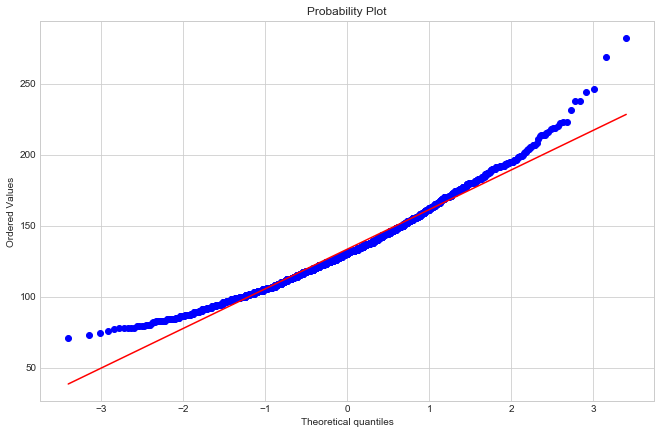

In [56]:
sp.stats.probplot(store_df['p1sales'], plot=plt)

**Observation**: the blue dots do not follow the red line. 

**Solution**: usually to make a variable normally distributed we take its log.

((array([-3.40305173, -3.15273159, -3.01392984, ...,  3.01392984,
          3.15273159,  3.40305173]),
  array([4.26267988, 4.29045944, 4.30406509, ..., 5.50533154, 5.59471138,
         5.64190707])),
 (0.20854371378600667, 4.870983332389844, 0.999309760317738))

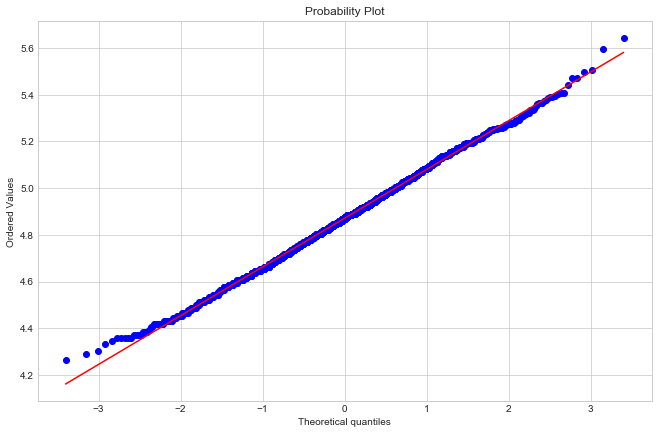

In [58]:
#Probplot taking the log of p1sales
sp.stats.probplot(np.log(store_df['p1sales']), plot=plt)

**Observation**: the blue points are much more aligned to the red line than previously.

### 6. Cumulative distribution

<font color=red>R code</font>: <br>
$$
plot(ecdf(store{\_}df\$p1sales),\\
     \> main = "Cumulative\,distribution\,of\,P1\,Weekly\,Sales",\\
     \> xlab = "P1\,Weekly\,Sales",\\
     \> ylab = "Cumulative\,proportion",\\
     \>yaxt="n")
$$

In [63]:
ecdf=ECDF(store_df['p1sales'])

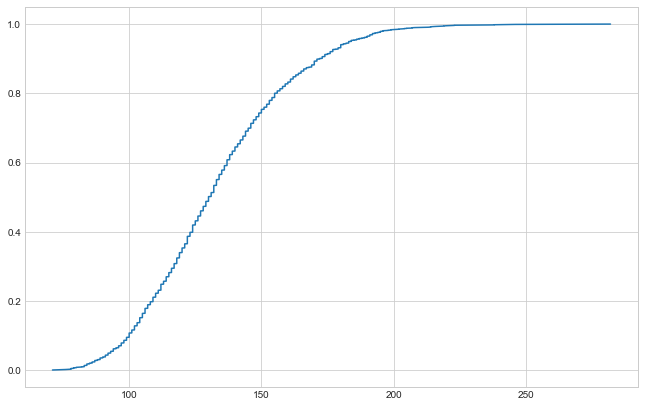

In [70]:
#PLot cumulative distribution of sales for product 1
plt.plot(ecdf.x, ecdf.y)

<font color=green>**Cracking the code**</font>: **$statsmodels.distributions.empirical{\_}distribution.ECDF()$**
<br>Return the empirical CDF of an array as a step function.
<br>*Syntax*: $statsmodels.distributions.empirical{\_}distribution.ECDF(variable)$
<br>*Reference*: http://www.statsmodels.org/dev/generated/statsmodels.distributions.empirical_distribution.ECDF.html

## STEP 6: Group by and aggregation

<font color=red>R code</font>: *Group By*<br>
$by(store{\_}df\$p1sales,\,store{\_}df\$storeNum,\,mean)$

In [64]:
#Group data by country
bycountry=store_df.groupby('country')

In [66]:
#Summary statistics with the grouped dataset
bycountry['p1sales'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AU,104.0,130.961538,25.114079,83.0,113.00,127.5,145.5,194.0
BR,208.0,132.076923,28.571190,78.0,111.75,129.0,152.0,214.0
CN,208.0,133.576923,26.747411,76.0,115.00,128.0,153.0,214.0
DE,520.0,135.238462,28.130868,71.0,115.75,133.0,152.0,282.0
GB,312.0,134.769231,28.449390,77.0,115.00,132.0,152.0,223.0
JP,416.0,132.127404,28.883574,78.0,111.00,130.0,147.0,246.0
US,312.0,131.727564,28.910987,73.0,110.00,126.5,150.0,269.0


In [67]:
#Apply multiple functions to the groups using agg()
bycountry['p1sales'].agg([np.sum, np.mean,np.std, len])

,sum,mean,std,len
country,,,,
AU,13620,130.961538,25.114079,104
BR,27472,132.076923,28.571190,208
CN,27784,133.576923,26.747411,208
DE,70324,135.238462,28.130868,520
GB,42048,134.769231,28.449390,312
JP,54965,132.127404,28.883574,416
US,41099,131.727564,28.910987,312
